# Humidity comparison with temp inputs between manometer temp and fitted tank temp
# Humidity in ppmv, Td and Td0

## 01_intialization

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
from safedigital import gas_pressure as GP
import pandas as pd
import numpy as np
import seaborn as sns
import pynverse as inv
sns.set(color_codes=True)
cur_dir = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics'

## 02_data splicing

In [3]:
test_date_list = ['20221009', '20221010', '20221011',
                  '20221012', '20221013']  # all test dates
test_id_list = ['_DTR_GP_SA12kV_SGCC_D=V_Bushing_Current_Drop',
                '_DTR_GP_SA12kV_SGCC_D=V_Bushing_Current_Variant',
                '_DTR_GP_SA12kV_SGCC_D=V_Bushing_Current_Variant',
                '_DTR_GP_SA12kV_SGCC_D=V_Bushing_630A',
                '_DTR_GP_12kV_SGCC_D=V_Bushing_700A']  # all test names

date_id_dict = {test_date_list[i]: test_id_list[i]
                for i in range(len(test_date_list))}
data_df_dict = {}

# load data in all dates save in a dict
for num, date in enumerate(test_date_list):
	data_path = (cur_dir + '\\' + date + date_id_dict[date] + '\\' +
              '1_Data formatted' + '\\' + date + '_data_clean_1min.csv')
	data_df = pd.read_csv(data_path, header=0)
	data_df.index = [datetime.strptime(
		data_df.iloc[i, 0], '%Y-%m-%d %H:%M:%S') for i in range(len(data_df))]
	# print(data_df.dtypes)
	data_df_dict[date] = data_df
	if num == 0:
		data_all_df = data_df
	else:
		data_all_df = data_all_df.append(data_df)

# data in all dates
# temp from manometer in all dates
t_mano_all = data_all_df['Unit1_Mano_T'].values
# pressure from manometer in all dates
p_mano_all = data_all_df['Unit1_Mano_P'].values
t_tank_mid_all = data_all_df['t_V2_tank_mid'].values + \
	data_all_df['t_oil_bottle_1'].values

# t_oil_bottle_2,t_oil_bottle_3,t_oil_bottle_4 values are temperature rise against t_oil_bottle_1
t_amb_all = (data_all_df['t_oil_bottle_4'].values +
             data_all_df['t_oil_bottle_3'].values +
             data_all_df['t_oil_bottle_2'].values +
             data_all_df['t_oil_bottle_1'].values * 4) / 4
t_ideal_all = p_mano_all / p_mano_all[0] * (t_mano_all[0] + 273.15) - 273.15
cur_phB_all = data_all_df['Unit1_B_Cur'].values


## 03_Gas temp comparison 

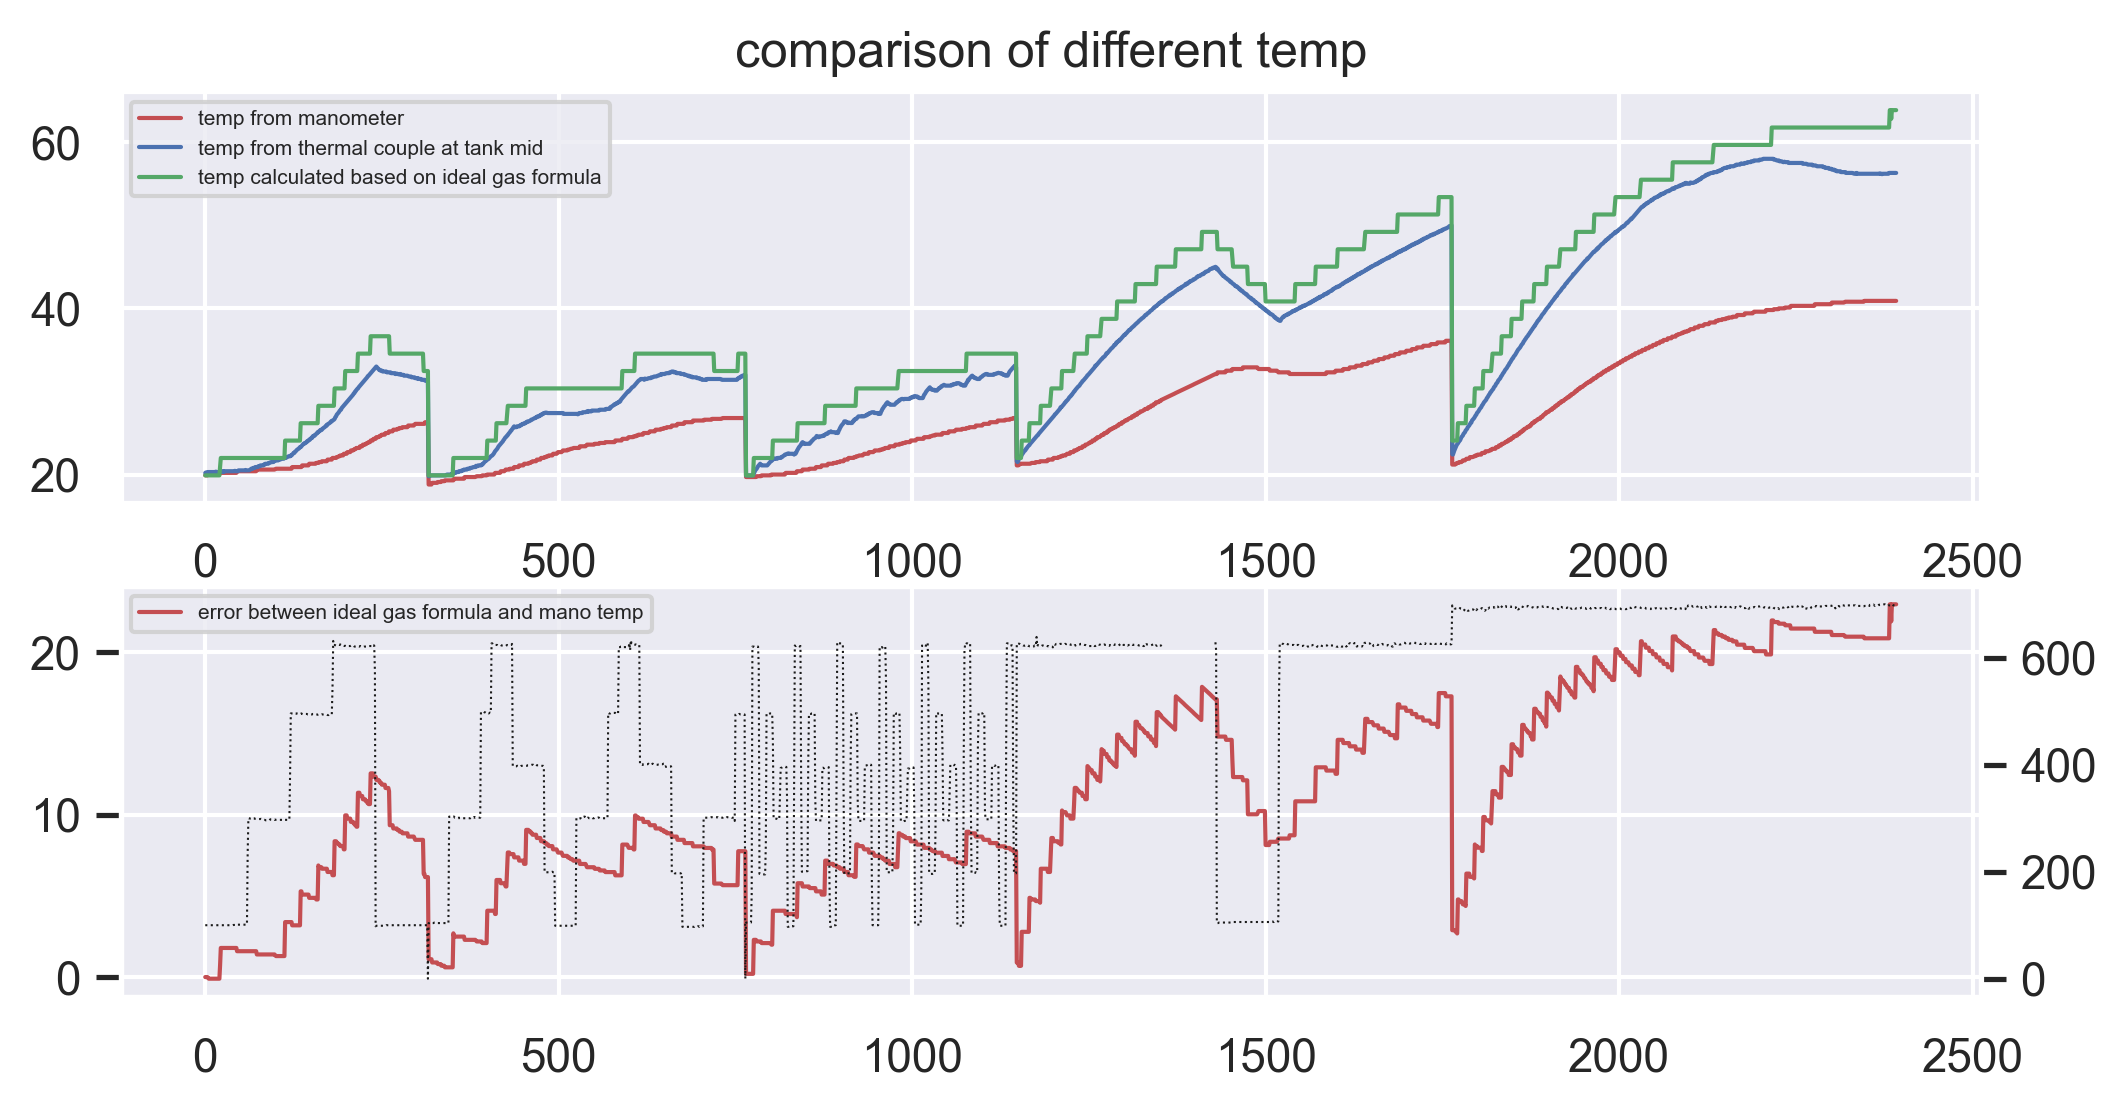

In [4]:

# compare mano temp, tank mid temp, ideal avg tank temp
plt.figure(figsize=(8, 4),
           dpi=300)
plt.subplot(2, 1, 1)
plt.plot(t_mano_all,
         c='r',
         linewidth=1,
         label='temp from manometer')
plt.plot(t_tank_mid_all,
         c='b',
         linewidth=1,
         label='temp from thermal couple at tank mid')
plt.plot(t_ideal_all,
         c='g',
         linewidth=1,
         label='temp calculated based on ideal gas formula')
plt.title('comparison of different temp')
plt.legend(fontsize=5)


plt.subplot(2, 1, 2)

plt.plot(t_ideal_all - t_mano_all,
         c='r',
         linewidth=1,
         label='error between ideal gas formula and mano temp')
plt.legend(fontsize=5)
ax1 = plt.gca()
ax2 = plt.twinx(ax1)
ax2.plot(cur_phB_all,
         c='k',
         linestyle='dotted',
         linewidth=0.5,
         label='current of phB')
plt.grid(None)

# plt.title('error of different temp')

## 04_Lanso vs Buck formular ew,ei

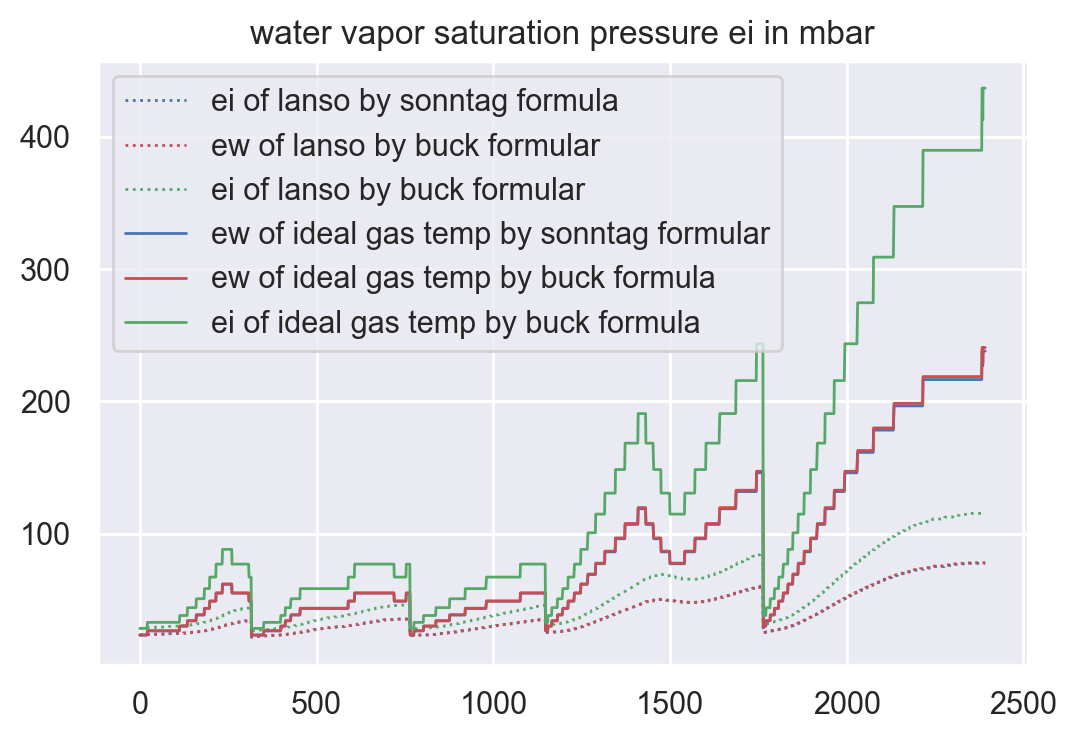

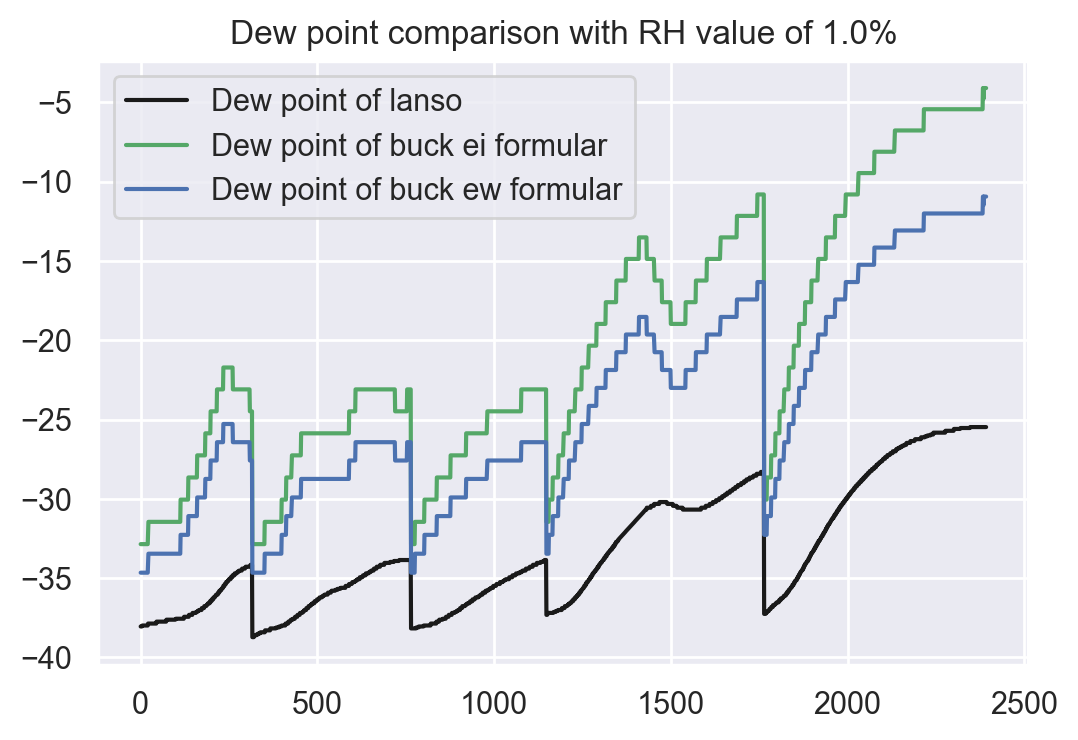

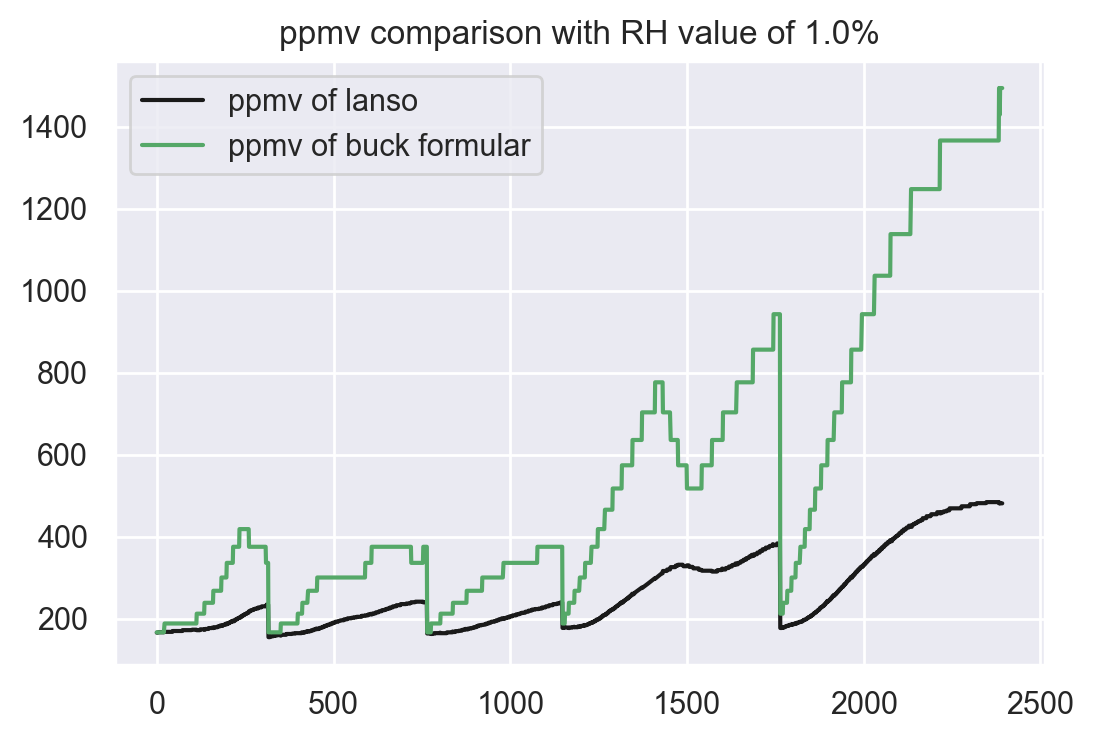

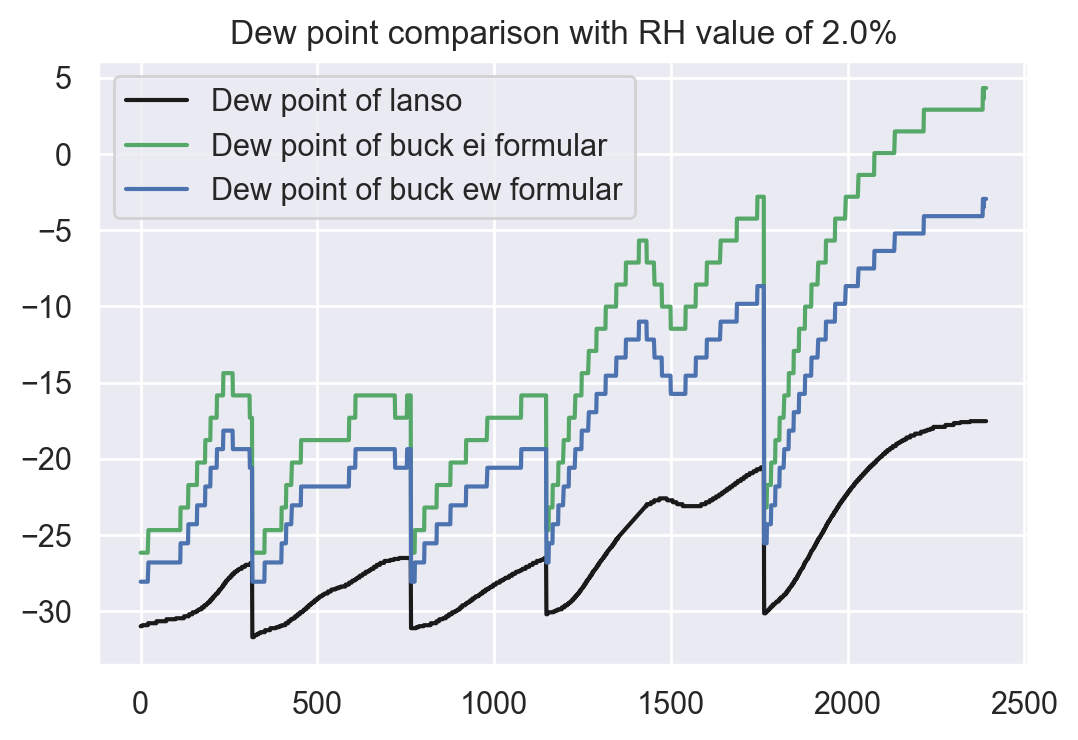

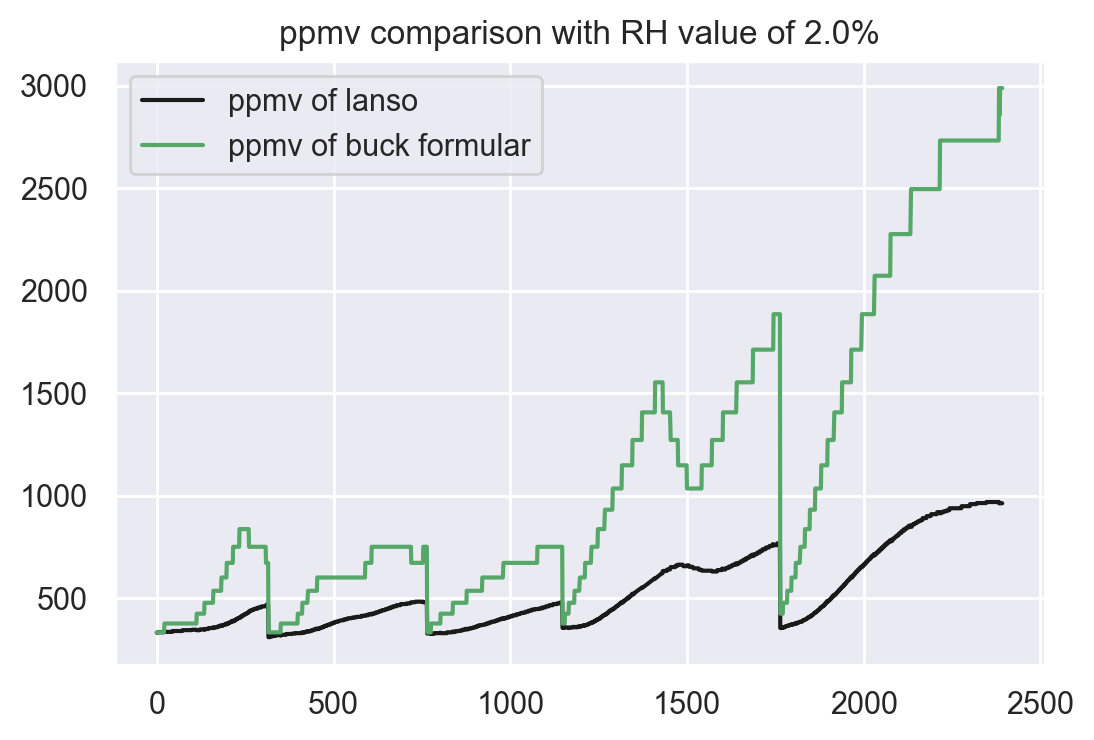

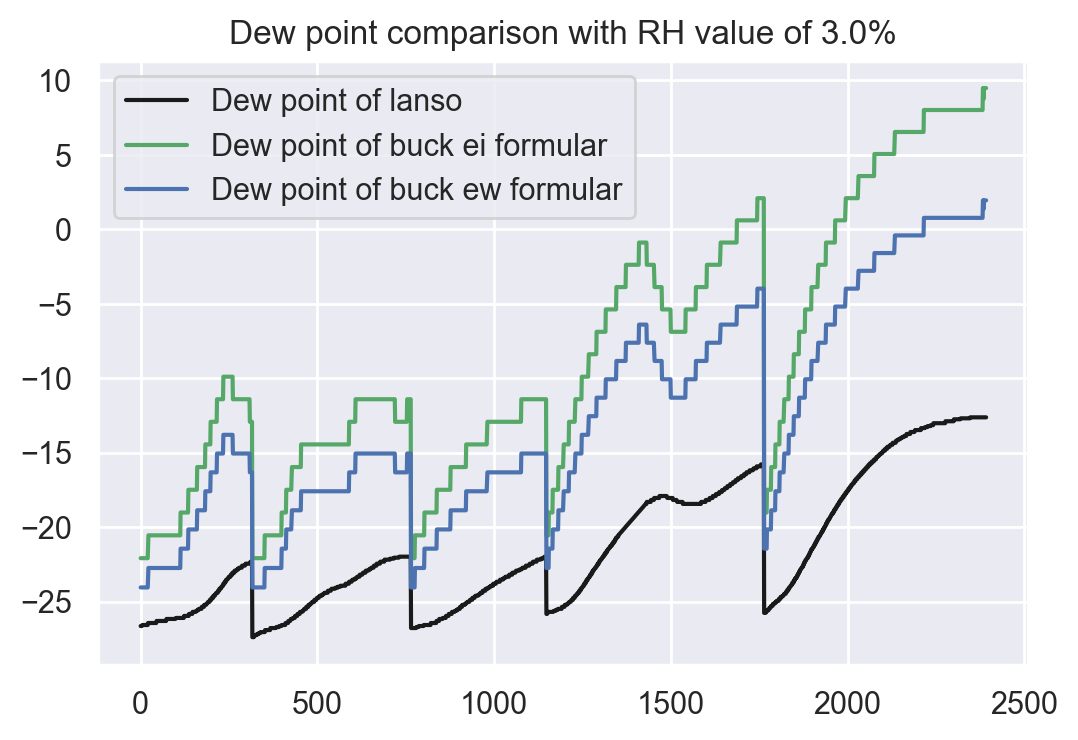

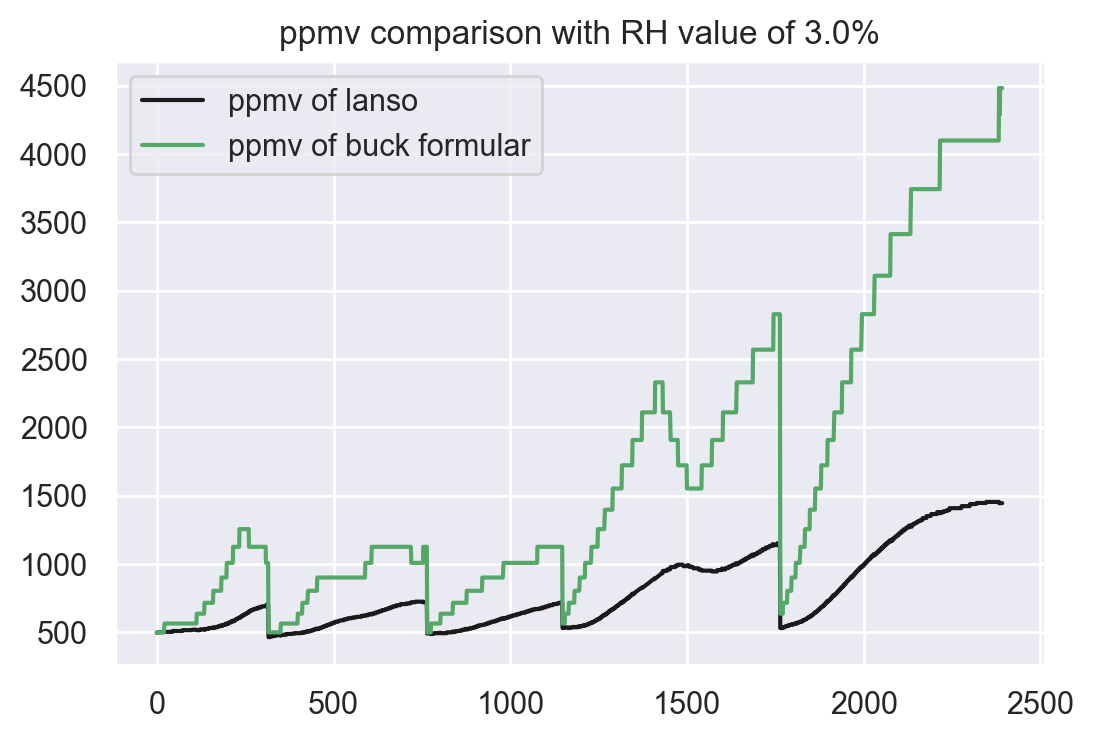

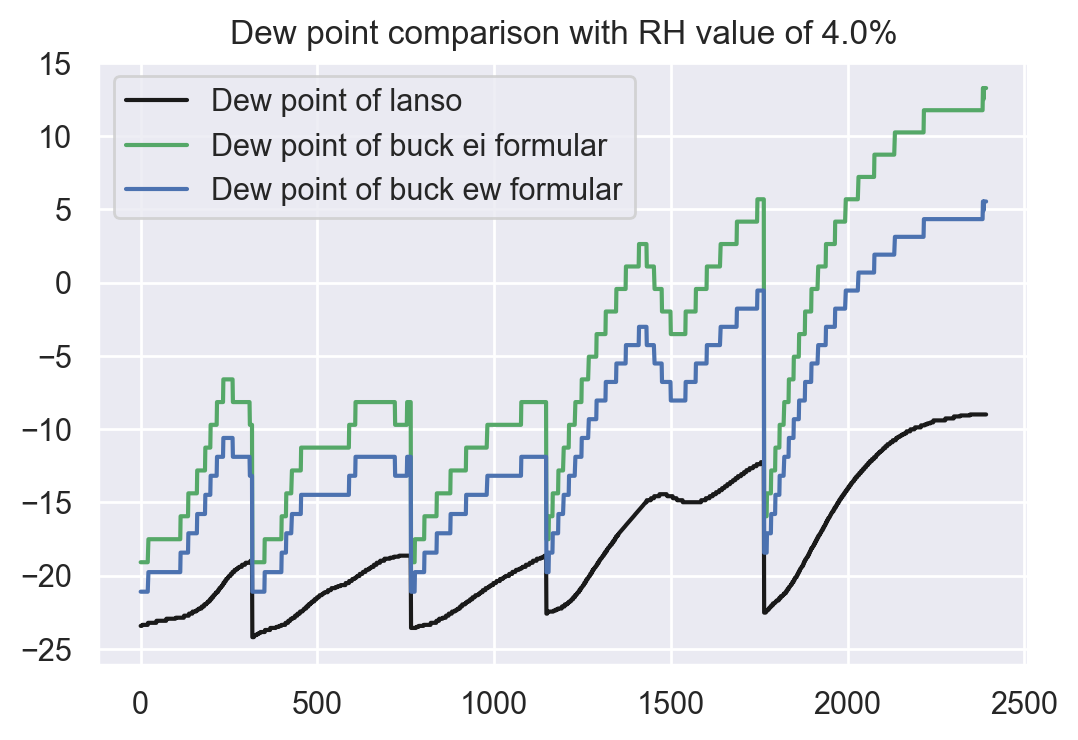

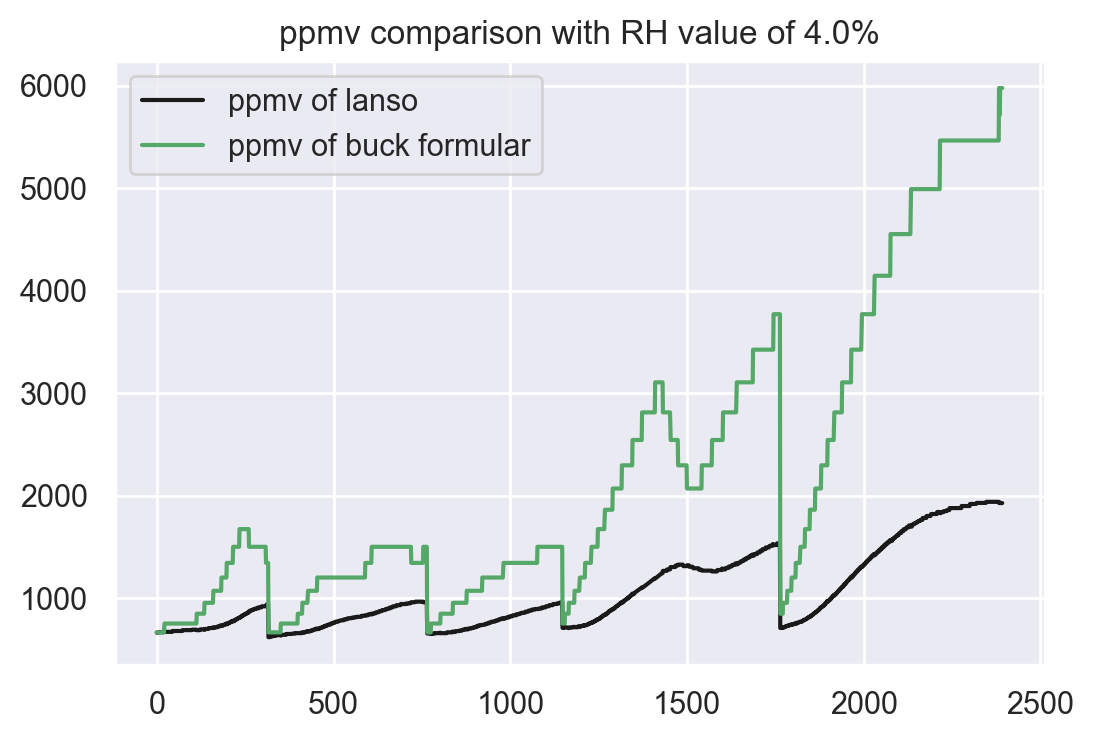

In [18]:
tc_mano = t_mano_all
tc_ideal = t_ideal_all
rh_arr = np.arange(0.01,0.05,0.01)
ew_mano_sonntag = [GP.GasPresExperiment_CN.cal_vapor_pressure(tc_mano[i], p_mano_all[i] * 1000, 'sonntag')for i in range(len(tc_mano))]
ew_mano_buck =  [GP.GasPresExperiment_CN.cal_vapor_pressure(tc_mano[i], p_mano_all[i] * 1000, 'buck_ew')for i in range(len(tc_mano))]
ei_mano_buck =  [GP.GasPresExperiment_CN.cal_vapor_pressure(tc_mano[i], p_mano_all[i] * 1000, 'buck_ei')for i in range(len(tc_mano))]
# ei_mano_buck_no_P = [GP.GasPresExperiment_CN.cal_vapor_pressure(tc_mano[i], p_mano_all[i] * 1000, 'buck_no_P')for i in range(len(tc_mano))]
ew_ideal_sonntag = [GP.GasPresExperiment_CN.cal_vapor_pressure(tc_ideal[i], p_mano_all[i] * 1000, 'sonntag')for i in range(len(tc_mano))]
ew_ideal_buck =  [GP.GasPresExperiment_CN.cal_vapor_pressure(tc_ideal[i], p_mano_all[i] * 1000, 'buck_ew')for i in range(len(tc_mano))]
ei_ideal_buck =  [GP.GasPresExperiment_CN.cal_vapor_pressure(tc_ideal[i], p_mano_all[i] * 1000, 'buck_ei')for i in range(len(tc_mano))]
# ei_ideal_buck_no_P = [GP.GasPresExperiment_CN.cal_vapor_pressure(tc_ideal[i], p_mano_all[i] * 1000, 'buck_no_P')for i in range(len(tc_mano))]


plt.figure(dpi=200)
plt.title('water vapor saturation pressure ei in mbar')
plt.plot(ew_mano_sonntag, c='b', linestyle='dotted', label='ei of lanso by sonntag formula', linewidth=1)
plt.plot(ew_mano_buck, c='r', linestyle='dotted', label='ew of lanso by buck formular', linewidth=1)
plt.plot(ei_mano_buck, c='g', linestyle='dotted', label='ei of lanso by buck formular', linewidth=1)
# plt.plot(ei_mano_buck_no_P, c='k', label='ei of lanso by sonntag formula ')
plt.plot(ew_ideal_sonntag, c='b',  label='ew of ideal gas temp by sonntag formular', linewidth=1)
plt.plot(ew_ideal_buck, c='r', label='ew of ideal gas temp by buck formula', linewidth=1)
plt.plot(ei_ideal_buck, c='g', label='ei of ideal gas temp by buck formula', linewidth=1)
# plt.plot(ei_ideal_buck_no_P, c='g', label='di of ideal gas tepm by buck formular')
plt.legend()

for rh in rh_arr[:]:
	td_lanso, td_buck_ei, td_buck_ew = np.zeros(
		shape=p_mano_all.shape), np.zeros(shape=p_mano_all.shape), np.zeros(shape=p_mano_all.shape)
	ppmv_lanso, ppmv_buck = np.zeros(
		shape=p_mano_all.shape), np.zeros(shape=p_mano_all.shape)
	for idx, p_bar in enumerate(p_mano_all):
		ppmv_lanso[idx] = ew_mano_sonntag[idx] * rh / (p_bar * 1e3 - ew_mano_sonntag[idx] * rh) * 1e6
		ppmv_buck[idx] = ew_ideal_buck[idx] * rh / (p_bar * 1e3) * 1e6
		sonntag_func = (lambda x: np.exp(-6096.9385 / (x + 273.15) +
										 16.635794 -
										 2.711193 * 10 ** (-2) * (x + 273.15) +
										 1.673952 * 10 ** (-5) * (x + 273.15) ** 2 +
										 2.433502 * np.log(x + 273.15)))  # mbar
		sonntag_inv = inv.inversefunc(sonntag_func)

		buck_ei_func = (lambda x: (1.0003 + 4.18 * 1e-6 * p_bar * 1e3) *
		             6.1115 * np.exp((22.452 * x) / (272.55 + x)))
		buck_ew_func = (lambda x: (1.0007 + 3.46 * 1e-6 * p_bar * 1e3) *
		             6.1121 * np.exp((17.502 * x) / (240.97 + x)))
		# buck_no_P_func = (lambda x: 6.1115 * np.exp((22.452 * x) / (272.55 + x)))
		buck_ei_inv = inv.inversefunc(buck_ei_func)
		buck_ew_inv = inv.inversefunc(buck_ew_func)
		# buck_no_P_inv = inv.inversefunc(buck_no_P_func)
		td_lanso[idx] = sonntag_inv(ew_mano_sonntag[idx] * rh)
		td_buck_ew[idx] = buck_ei_inv(ew_ideal_buck[idx] * rh)
		td_buck_ei[idx] = buck_ei_inv(ei_ideal_buck[idx] * rh)
		# print('{:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}'.format(ew_mano_sonntag[idx], ei_ideal_buck[idx], tc_mano[idx], tc_ideal[idx], td_lanso[idx], td_buck[idx]))
	
	plt.figure(dpi=200)
	plt.title('Dew point comparison with RH value of {:.1f}%'.format(rh * 100))
	plt.plot(td_lanso, c='k', label='Dew point of lanso')
	plt.plot(td_buck_ei, c='g', label='Dew point of buck ei formular')
	plt.plot(td_buck_ew, c='b', label='Dew point of buck ew formular')
	plt.legend()

	plt.figure(dpi=200)
	plt.title('ppmv comparison with RH value of {:.1f}%'.format(rh * 100))
	plt.plot(ppmv_lanso, c='k', label='ppmv of lanso')
	plt.plot(ppmv_buck, c='g', label='ppmv of buck formular')
	plt.legend()

### calculation verification of different formula

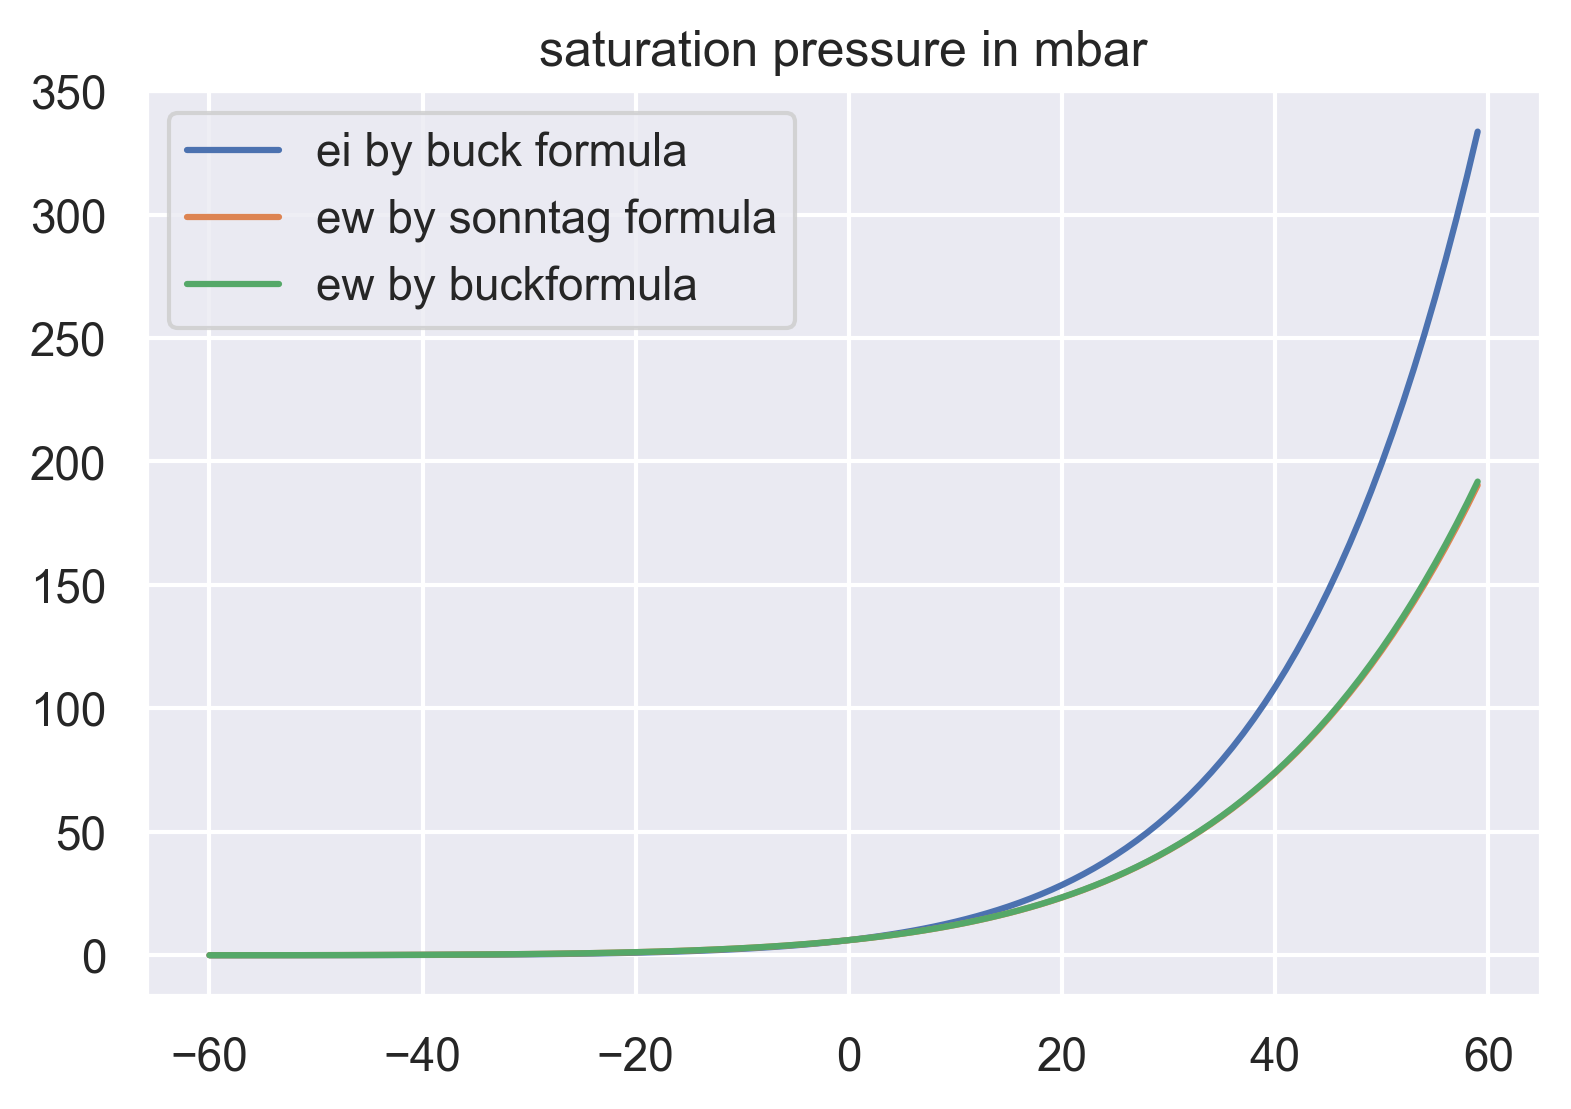

In [19]:
buck_ei_func = (lambda x: (1.0003 + 4.18 * 1e-6 * 1.0 * 1e3) *
		             6.1115 * np.exp((22.452 * x) / (272.55 + x)))
buck_ew_func = (lambda x: (1.0007 + 3.46 * 1e-6 * 1.0 * 1e3) *
		             6.1121 * np.exp((17.502 * x) / (240.97 + x)))
sonntag_func = (lambda x: np.exp(-6096.9385 / (x + 273.15) +
								 16.635794 -
								 2.711193 * 10 ** (-2) * (x + 273.15) +
								 1.673952 * 10 ** (-5) * (x + 273.15) ** 2 +
								 2.433502 * np.log(x + 273.15)))  # mbar
buck_ei_inv = inv.inversefunc(buck_ei_func)
t_arr = np.arange(-60,60,1)
ei_buck, ew_sonntag, ew_buck = np.zeros(shape=t_arr.shape), np.zeros(
	shape=t_arr.shape), np.zeros(shape=t_arr.shape)

for idx, t in enumerate(t_arr):
    ei_buck[idx] = buck_ei_func(t)
    ew_sonntag[idx] = sonntag_func(t)
    ew_buck[idx] = buck_ew_func(t)
    # t_inv_buck[idx] = buck_inv_tmp(ei_buck[idx])
    # t_inv_sonntag[idx] = sonntag_inv(ew_sonntag[idx])
plt.figure(dpi=300)
plt.title('saturation pressure in mbar')    
plt.plot(t_arr, 
        ei_buck,
        label='ei by buck formula')
plt.plot(t_arr, 
         ew_sonntag,
         label='ew by sonntag formula')
plt.plot(t_arr, 
         ew_buck,
         label='ew by buckformula')
plt.legend()

